<a href="https://colab.research.google.com/github/chaurasiauttkarsh/Language-Identification-n-grams-dnn/blob/main/ColabNotebook/Language_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset


WiLI-2018, the Wikipedia language identification benchmark dataset, contains 235000 paragraphs of 235 languages. Each language in this dataset contains 1000 rows/paragraphs. The following is the subset of dataset used:

⦁ English
⦁ Arabic
⦁ French
⦁ Hindi
⦁ Urdu
⦁ Portuguese
⦁ Persian
⦁ Pushto
⦁ Spanish
⦁ Korean
⦁ Tamil
⦁ Turkish
⦁ Estonian
⦁ Russian
⦁ Romanian
⦁ Chinese
⦁ Swedish
⦁ Latin
⦁ Indonesian
⦁ Dutch
⦁ Japanese
⦁ Thai


https://www.kaggle.com/zarajamshaid/language-identification-datasst

### Importing the libraries

In [ ]:
import pandas as pd # Pandas
import numpy as np # Numpy
import re # Regular Expressions
import seaborn as sns # Seaborn
import matplotlib.pyplot as plt # Matplotlib

### Loading the dataset from drive location

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/NLP/Language Identification

/content/gdrive/MyDrive/NLP/Language Identification


### Dataset Inspection

In [ ]:
data = pd.read_csv("dataset.csv")
data.head(10)

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
7,müller mox figura centralis circulorum doctoru...,Latin
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese


### Checking different unique languages in the dataset

In [ ]:
lang = np.array(pd.unique(data['language']))
print("Total number of langauges:", len(lang))
print("Languages in the dataset:", lang)

Total number of langauges: 22
Languages in the dataset: ['Estonian' 'Swedish' 'Thai' 'Tamil' 'Dutch' 'Japanese' 'Turkish' 'Latin'
 'Urdu' 'Indonesian' 'Portugese' 'French' 'Chinese' 'Korean' 'Hindi'
 'Spanish' 'Pushto' 'Persian' 'Romanian' 'Russian' 'English' 'Arabic']


### Checking the count of each language in the dataset

In [ ]:
data['language'].value_counts()

Turkish       1000
Urdu          1000
Swedish       1000
Pushto        1000
Chinese       1000
Romanian      1000
Latin         1000
Estonian      1000
Arabic        1000
Portugese     1000
Dutch         1000
Hindi         1000
Korean        1000
Japanese      1000
French        1000
Thai          1000
Tamil         1000
Russian       1000
English       1000
Spanish       1000
Persian       1000
Indonesian    1000
Name: language, dtype: int64

### Preprocessing the dataset

In [ ]:
def data_preprocess(text):
  # Removing numbers and symbols
  text = re.sub(r'[!@#$()-_,n"%^*?:;~`0-9]', ' ', text) 
  text = re.sub(r'[[]]', ' ', text)
  # Lowercasing the text
  text = text.lower() 
  return text

In [ ]:
i = 0
# Looping over all the
for text in data['Text']:
  # Updating with the preprocessed dataset
  data['Text'][i] = data_preprocess(text)
  i += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Possible nested set at position 1
  after removing the cwd from sys.path.


### Splitting the dataset into train, validation and test sets

In [ ]:
import math # math library

# Fraction of training examples
train_split = 0.6
# Fraction of testing examples
validation_split = 0.2

# Length of the dataset
length = len(data)

# Splitting the dataset
range1 = math.floor(0.6*length)
range2 = math.floor(0.6*length) + math.floor(0.2*length)
training_data = data[:range1]
validation_data =  data[range1: range2]
testing_data = data[range2:]

# Size of train, validation and test dataset
print("Training data length: ", len(training_data))
print("Validation data length: ", len(validation_data))
print("Testing data length: ",len(testing_data))

Training data length:  13200
Validation data length:  4400
Testing data length:  4400


### Getting the n-grams from the dataset

The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted. All values of n such such that min_n <= n <= max_n will be used. For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. n-feat represents number of most important n-gram features to be extracted from corpus.


In [ ]:
# Import CountVectorizer object
from sklearn.feature_extraction.text import CountVectorizer

# Function to extract n-grams
def get_n_grams(corpus, n_feat, min_n, max_n):
    #fit the n-gram model
    vectorizer = CountVectorizer(analyzer = 'char',
                                 ngram_range = (min_n, max_n),
                                 max_features = n_feat)
    # Train vectorizer on given corpus
    X = vectorizer.fit_transform(corpus)
    # Get model feature names
    feature_names = vectorizer.get_feature_names()
    return feature_names

### Building the vocabulary

The following are changeable hyperparameters:
1. n_feat = 200 # No of n-grams to be extracted from single language
2. min_n = 3 # min n-gram
3. max_n = 3 # max n-gram

In [ ]:
n_feat = 200 # No of n-grams to be extracted from single language
min_n = 3 # min n-gram
max_n = 3 # max n-gram

#obtain n-grams from each language
features_set = set()
lang = pd.unique(training_data['language'])
for l in lang:
    # get corpus filtered by language
    corpus = data[data.language==l]['Text']
    # get n_feat most frequent trigrams
    trigrams = get_n_grams(corpus, n_feat, min_n, max_n)
    # add to set
    features_set.update(trigrams)
    
#create vocabulary list using feature set
vocab = dict()
for i,f in enumerate(features_set):
    vocab[f]=i

### Length of vocabulary

In [ ]:
vocab_length = len(vocab)
print(vocab_length)

2845


### Creating feature matrix for training, validation and text data

In [ ]:
#train count vectoriser using vocabulary
vectorizer = CountVectorizer(analyzer='char',
                             ngram_range=(3, 3),
                             vocabulary=vocab)

#create feature matrix for training set
corpus = training_data['Text']   
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
training_feat = pd.DataFrame(data=X.toarray(),columns=feature_names)

#Scale feature matrix 
train_min = training_feat.min()
train_max = training_feat.max()
training_feat = (training_feat - train_min)/(train_max-train_min)

#Add target variable 
training_feat['language'] = list(training_data['language'])

#create feature matrix for validation set
corpus = validation_data['Text']   
X = vectorizer.fit_transform(corpus)

validation_feat = pd.DataFrame(data=X.toarray(),columns=feature_names)
validation_feat = (validation_feat - train_min)/(train_max-train_min)
validation_feat['language'] = list(validation_data['language'])

#create feature matrix for test set
corpus = testing_data['Text']   
X = vectorizer.fit_transform(corpus)

testing_feat = pd.DataFrame(data=X.toarray(),columns=feature_names)
testing_feat = (testing_feat - train_min)/(train_max-train_min)
testing_feat['language'] = list(testing_data['language'])

In [ ]:
training_feat.shape

(13200, 2846)

In [ ]:
validation_feat.shape

(4400, 2846)

In [ ]:
testing_feat.shape

(4400, 2846)

### Encode the target vector

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

#Fit encoder
encoder = LabelEncoder()
encoder.fit(lang)

def encode(y):
    y_encoded = encoder.transform(y)
    y_dummy = np_utils.to_categorical(y_encoded)
    return y_dummy

### Building and training the DNN

In [ ]:
# Importing keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

#Get training data
x = training_feat.drop('language',axis=1)
y = encode(training_feat['language'])
x_val = validation_feat.drop('language',axis=1)
y_val = encode(validation_feat['language'])

#Define model
model = Sequential()
#input dimension is the length of vocabulary
model.add(Dense(512, input_dim=vocab_length, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
# Output dimension is the length of total number of target languages
model.add(Dense(len(lang), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the model
Hyperparameters:
1. epochs : No of times dataset is passed forward and backward through the neural network.
2. batch_size : The number of examples in a batch.

In [ ]:
epochs = 4 # No of times dataset is passed forward and backward through the neural network
batch_size = 100 # The number of examples in a batch

history = model.fit(x, y, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/4
132/132 [==============================] - 4s 28ms/step - loss: 0.5276 - accuracy: 0.9148 - val_loss: 0.1027 - val_accuracy: 0.9800
Epoch 2/4
132/132 [==============================] - 3s 25ms/step - loss: 0.0715 - accuracy: 0.9849 - val_loss: 0.0783 - val_accuracy: 0.9845
Epoch 3/4
132/132 [==============================] - 3s 25ms/step - loss: 0.0303 - accuracy: 0.9933 - val_loss: 0.0863 - val_accuracy: 0.9832
Epoch 4/4
132/132 [==============================] - 3s 25ms/step - loss: 0.0146 - accuracy: 0.9973 - val_loss: 0.0881 - val_accuracy: 0.9850


### Plotting the results

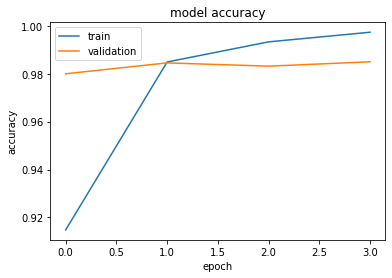

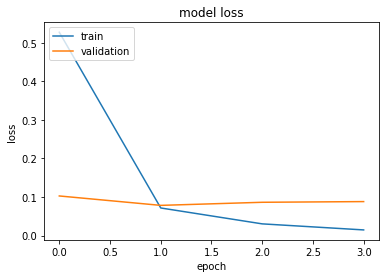

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Evaluating on the test set

In [ ]:
x_test = testing_feat.drop('language',axis=1)
y_test = encode(testing_feat['language'])
history = model.evaluate(x_test, y_test)

138/138 [==============================] - 1s 5ms/step - loss: 0.1034 - accuracy: 0.9786


### Saving the model in current location

In [ ]:
model.save('model.h5')

### Saving the parameters in current location

In [ ]:
import pickle
filename = 'parameters.sav'
list_of_dumps = [train_max, train_min, vectorizer, feature_names, encoder]
pickle.dump(list_of_dumps, open(filename, 'wb'))

### Making sample predictions

### Detecting the language

In [ ]:
# Preprocessing each text line
def data_preprocess(text):
  # Removing numbers and symbols
  text = re.sub(r'[!@#$()-_,n"%^*?:;~`0-9]', ' ', text) 
  text = re.sub(r'[[]]', ' ', text)
  # Lowercasing the text
  text = text.lower() 
  return text

# Function to detect language
def detect_language(text):
  text = data_preprocess(text)
  X = vectorizer.fit_transform([text])
  X_feat = pd.DataFrame(data=X.toarray(),columns=feature_names)
  X_feat = (X_feat - train_min)/(train_max-train_min)
  predicted_my_val = model.predict(X_feat)
  val = np.where(predicted_my_val[0] == np.amax(predicted_my_val[0]))[0]
  print("Detected Language :", encoder.classes_[val[0]])

In [ ]:
my_text = input("Enter the text : ")
my_val = detect_language(my_text)

Enter the text : De taal is in grammaticaal opzicht verregaand gelijk aan het Hindi dat in Bollywood-films wordt gesproken. De taal die in Bollywood-films wordt gesproken bevat elementen van beide officiële talen. Overigens zit het verschil hoofdzakelijk in de aan het Arabisch en Perzisch ontleende woordenschat en constructies. De divergerende ontwikkeling van Hindi en
Detected Language : Dutch
